# Measure temperature-density relation in snapshots

In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import fake_spectra.tempdens as fake_tdr
import temperature_density as tdr
import read_gadget
import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
basedir='/Users/font/CosmoData/test_sim_emulator/test_1/sim_pair_1/sim_minus/'
test_snap_num=2

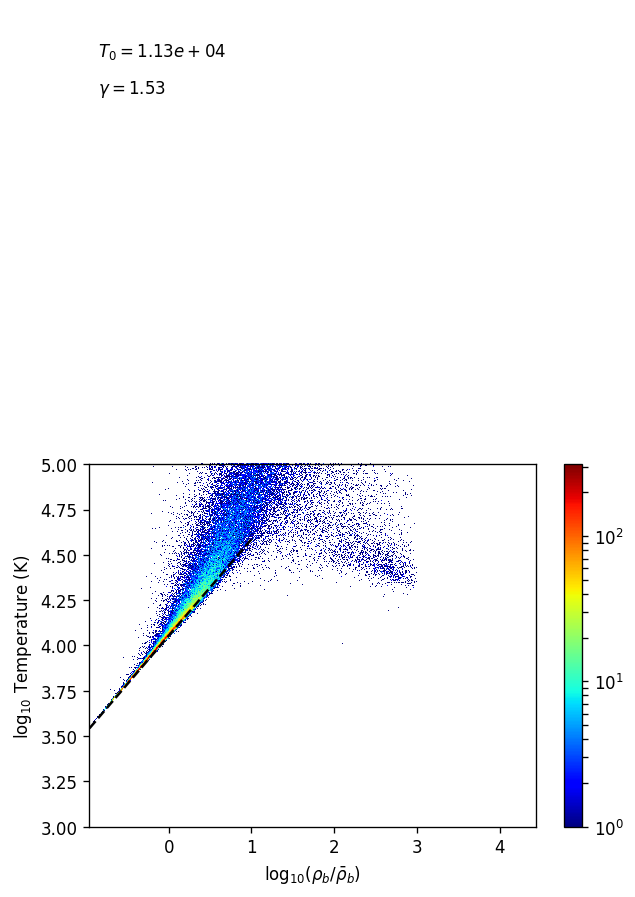

In [9]:
# try new function first
T0,gamma=fake_tdr.fit_td_rel_plot(test_snap_num, basedir+'output/', Tscale=1, gammascale=1, plot=True, use_old=False)

use old version of fit_td_rel_plot


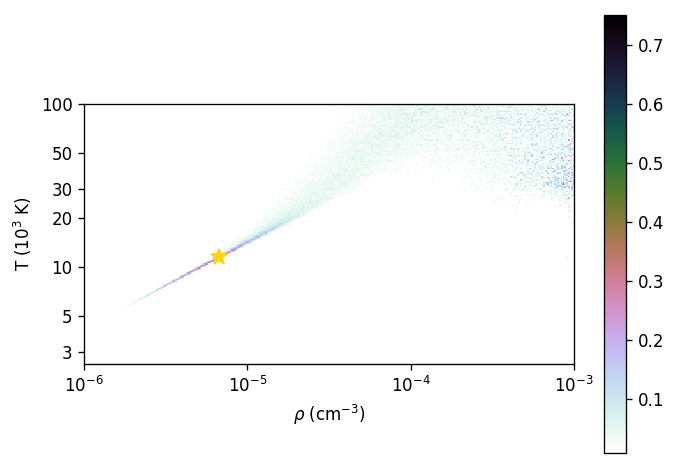

In [10]:
# try old function
T0_old,gamma_old=fake_tdr.fit_td_rel_plot(test_snap_num, basedir+'output/', Tscale=1, gammascale=1, plot=True, use_old=True)

In [11]:
print('new results',T0,gamma)
print('old results',T0_old,gamma_old)

new results 11305.8385347 1.53329074959
old results 11473.2224267 1.76794697263


### Measure TDR for all redshifts and write to JSON file

{'number': [0, 1, 2], 'z': [4.0, 3.0, 2.0], 'T0': [10609.884055195813, 15015.953316005935, 11305.838534711276], 'gamma': [1.3974285776369189, 1.4703063492084061, 1.5332907495931845], 'zmax': 20}


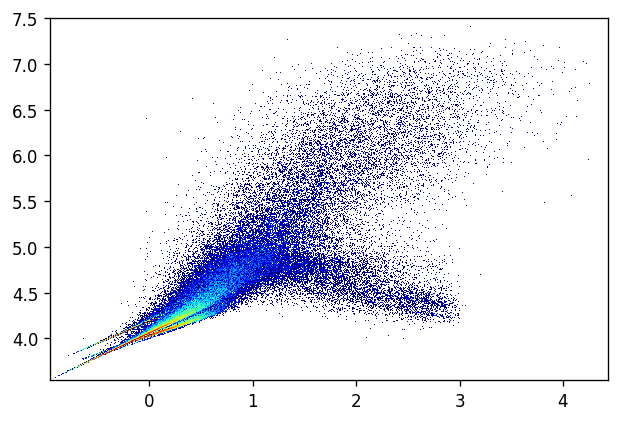

In [12]:
thermal_info=tdr.compute_TDR(basedir)
print(thermal_info)

In [13]:
filename='thermal_history.json'
json_file = open(filename,"w")
json.dump(thermal_info,json_file)
json_file.close()

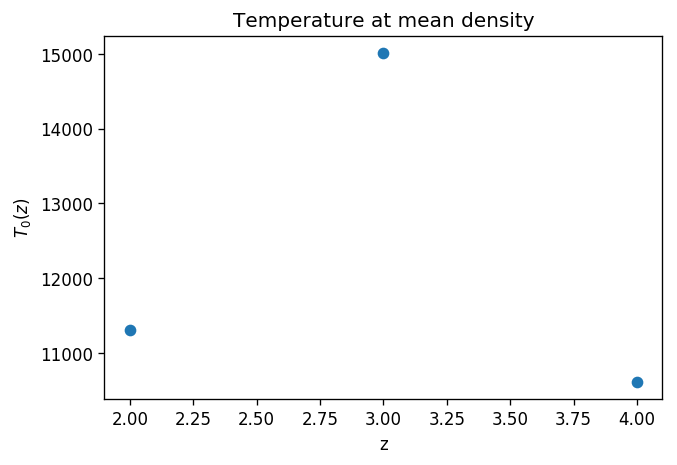

In [14]:
plt.plot(np.array(thermal_info['z']),np.array(thermal_info['T0']),'o')
plt.xlabel('z')
plt.ylabel(r'$T_0(z)$')
plt.title('Temperature at mean density')

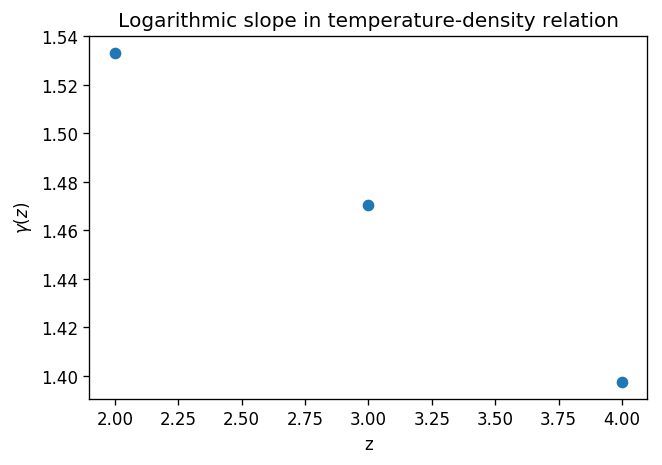

In [15]:
plt.plot(np.array(thermal_info['z']),np.array(thermal_info['gamma']),'o')
plt.xlabel('z')
plt.ylabel(r'$\gamma(z)$')
plt.title('Logarithmic slope in temperature-density relation')